<h1 style="text-align: center"><br> IDENTIFYING and CLASSIFYING METASTATIC BREAST CANCER using DEEP LEARNING<br></h1>

By: Taofeek Obafemi-Babatunde
Due: December 03, 2021

<a id='toc'></a>
# Table of Content

* [Abstract](#abstract)
* [Introduction](#intro)
* [Importing packages and loading data](#pac)
* [Data cleaning and data wrangling](#clean)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Basic Statistical Details](#bsd)
    * [Violin plot of features by diagnosis](#vpf)
    * [Kde Plot For Each Mean Feature](#kde)
    * [Relationship Between Features](#rbf)
        * [Correlation Heatmap](#chm)
        * [Feature Pair](#fp)
        * [Positively Correlated Features](#pcf)
        * [Un-Correlated Features](#ucf)
        * [Negatively Correlated Features](#ncf)
* [Statistical Analysis(Outliers)](#sa)
    * [Box Plot](#bp)
    * [Remove Outliers Using IQR](#iqr)
* [Principal Component Analysis(PCA)](#pca)
* [Machine Learning Classification](#ml)
    * [Building Feature Set](#sp)
    * [Support Vector Machine (SVM)](#svm)
        * [Kernel Selection Using Learning Curve ](#ks)
        * [Selection of Regularization parameter(C)](#srp)
        * [Confusion Metrix and ROC Curve](#cmrc)
* [Conclusion](#sum)
* [References](#ref)

<a id='abstract'></a>
## Abstract<br>

Breast cancer is one of the top causes of death among women in developing and under-developing countries alike. Breast cancer identification and classification in its early stages may allow patients to receive appropriate treatment. Using the notion of transfer learning, we proposes a new deep learning framework for the detection and classification of breast cancer in breast cytology images in this study. In general, deep learning architectures are designed to solve a single problem and are implemented in isolation. Transfer learning, in contrast to traditional learning paradigms that develop and yield in isolation, aims to apply the knowledge learned during the solution of one problem to a related problem. In the proposed system, pre-trained CNN architectures, such as GoogLeNet, Visual Geometry Group Network (VGGNet), and Residual Networks (ResNet), extract features from pictures, which are then input into a fully connected layer for average pooling classification of cancerous and benign cells. To evaluate the performance of the proposed framework, experiments are performed on standard benchmark data sets. It has been observed that the proposed framework outclass all the other deep learning architectures in terms of accuracy in detection and classification of breast tumor in cytology images. Therefore, the early and precise diagnosis of breast cancer plays a pivotal role to improve the prognosis of patients with this disease. Several studies have developed automated techniques using different medical imaging modalities to predict breast cancer development. However, few review studies are available to recapitulate the existing literature on breast cancer classification. These studies provide an overview of the classification, segmentation, or grading of many cancer types, including breast cancer, by using traditional machine learning approaches through hand-engineered features. This review focuses on breast cancer classification by using medical imaging multimodalities through state-of-the-art artificial deep neural network approaches. It is anticipated to maximize the procedural decision analysis in five aspects, such as types of imaging modalities, datasets and their categories, pre-processing techniques, types of deep neural network, and performance metrics used for breast cancer classification. Forty-nine journal and conference publications from eight academic repositories were methodically selected and carefully reviewed from the perspective of the five aforementioned aspects. In addition, this study provided quantitative, qualitative, and critical analyses of the five aspects. This review showed that mammograms and histopathologic images were mostly used to classify breast cancer. Moreover, about 55% of the selected studies used public datasets, and the remaining used exclusive datasets. Several studies employed augmentation, scaling, and image normalization pre-processing techniques to minimize inconsistencies in breast cancer images. Several types of shallow and deep neural network architecture were employed to classify breast cancer using images. The convolutional neural network was utilized frequently to construct an effective breast cancer classification model. Some of the selected studies employed a pre-trained network or developed new deep neural networks to classify breast cancer. Most of the selected studies used accuracy and area-under-the-curve metrics followed by sensitivity, precision, and F-measure metrics to evaluate the performance of the developed breast cancer classification models. Finally, this review presented 10 open research challenges for future scholars who are interested to develop breast cancer classification models through various imaging modalities. This review could serve as a valuable resource for beginners on medical image classification and for advanced scientists focusing on deep learning-based breast cancer classification through different medical imaging modalities.

<a id='intro'></a>
## Introduction - A Brief Overview on Breast Cancer<br>
Breast cancer is a cancer that develops in the breast and spreads to other parts of the body. When cells proliferate out of control, cancer develops. Breast cancer cells typically form a tumor, which can be seen on x-rays or felt as a lump. It's critical to remember that the majority of breast lumps are benign and not cancerous (malignant). Breast tumors that aren't cancerous are abnormal growths that don't spread outside of the breast. Although benign breast lumps are not life threatening, they can raise a woman's risk of developing breast cancer. Any lump or change in your breast should be evaluated by a health care specialist to see if it's benign or malignant (cancer) and if it'll alter your cancer risk in the future. 

The World Health Organization reported that cancer is the leading cause of non-accidental deaths worldwide; in specific, approximately 8.8 million people globally died of cancer in 2015. Breast cancer (BrC) is a common and fatal disease among women worldwide. BrC is the third highest fatal disease among different cancer types, such as lung, liver, and brain. According to WHO, 1.7 million (11.3%) casualties reported in 2015 were related to BrC (1). In addition, the number of new BrC patients is expected to increase by 70% in the next 20 years. Therefore, early and precise diagnosis plays a pivotal role to improve the prognosis and increase the survival rate of patients with BrC from 30 to 50% (1). In general, breast tumor has two types, benign and malignant. Benign is a noninvasive (non-cancerous) while malignant is an invasive (cancerous) type of tumor. Both tumors have further subtypes that need to be diagnosed individually because each may lead to different prognosis and treatment plans. Proper diagnosis requires accurate identification of each subcategory of BrC, also called BrC multi-classification. Medical imaging modalities are more commonly adopted and effective for BrC detection than any other testing method. 

Well-known medical imaging modalities for BrC diagnosis are mammography (breast X-ray images), ultrasound (US) imaging or sonograms, magnetic resonance imaging (MRI), computed tomography (CT) and Histopathology (HP) image (2, 3, 4). Medical imaging is usually performed manually by one or more expert doctors (radiologist, sinologist, or pathologist). An absolute decision is made after consensus if more than one pathologist is available for BrC HP image analysis; otherwise, findings are reported by one pathologist only. Nonetheless, manual HP image analysis faces three main issues (5, 6). First, more than one expert pathologist at one place is usually unavailable in developing countries. Second, the procedure of image analysis for the multi-class classification of BrC is cumbersome and time consuming for pathologists. Therefore, pathologists may experience fatigue and deteriorated attention during image analysis. Finally, a reliable BrC subtype identification depends on the professional experience and domain knowledge of an expert pathologist. These issues may cause misdiagnosis, especially in the early stages of BrC. However, computer-aided diagnosis (CAD) systems can serve as a second opinion to solve BrC multi-classification problems.

A CAD system is an affordable, readily available, fast, and reliable source of early diagnosis (7, 8). This system assists radiologists and physicians in identifying abnormalities by using various imaging modalities, which have reduced the mortality rates from 30 to 70% (9).

The Breast Cancer (Wisconsin) Diagnosis dataset contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass.
<br><br>
Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter);
- texture (standard deviation of gray-scale values);
- perimeter;
- area;
- smoothness (local variation in radius lengths);
- compactness (perimeter^2 / area - 1.0);
- concavity (severity of concave portions of the contour);
- concave points (number of concave portions of the contour);
- symmetry;
- fractal dimension (“coastline approximation” - 1).

<br><br>
The mean, standard error (SE) and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.
<br><br>
We will analyze the features to understand the predictive value for diagnosis. We will then create models using two different algorithms and use the models to predict the diagnosis.

<a id='pac'></a>
## Importing Packages and Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import visuals.py 
import visuals as vp
import properties_1 as ps
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [3]:
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

<a id='data'></a>
### Load the Data

In [4]:
# Read the CSV File Using Pandas read_csv function
df = pd.read_csv('./data.csv')
df.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1,47.92
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,...,403.5,600.4,386.0,716.9,1347.0,1479.0,1261.0,858.1,1265.0,181.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0.0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0.0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0.0


<a id='clean'></a>
## Data cleaning and data wrangling

In [5]:
# print the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#since the dataset can also contain null values count total rows in each column which contain null values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#'duplicated()' function in pandas return the duplicate row as True and other as False for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [8]:
#deleting useless columns deleting the "id" column
df.drop("id",axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

<a id='bsd'></a>
> ### Basic Statistical Details

In [9]:
p = df.describe().T
p = p.round(4)
table = go.Table(
    columnwidth=[0.8]+[0.5]*8,
    header=dict(
        values=['Attribute'] + list(p.columns),
        line = dict(color='#506784'),
        fill = dict(color='lightblue'),
    ),
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]],
        line = dict(color='#506789'),
        fill = dict(color=['lightblue', '#f5f5fa'])
    )
)
py.iplot([table], filename='table-of-mining-data')

B    357
M    212
Name: diagnosis, dtype: int64


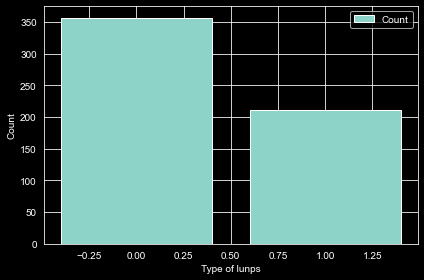

In [10]:
B, M = df['diagnosis'].value_counts()
s = [B,M]
print(df['diagnosis'].value_counts())
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar([0,1], s,align='center',
            label='Count')
    plt.ylabel('Count')
    plt.xlabel('Type of lunps')
    plt.legend(loc='best')
    plt.tight_layout()

In [11]:
B, M = df['diagnosis'].value_counts()
trace1 = go.Bar(y = (M, B), x = ['malignant', 'benign'],opacity = 0.8)


trace2 = go.Pie(labels = ['Benign','Malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8)


py.iplot([trace2])

<a id='vpf'></a>
> ### Violin Plot of Features by Diagnosis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

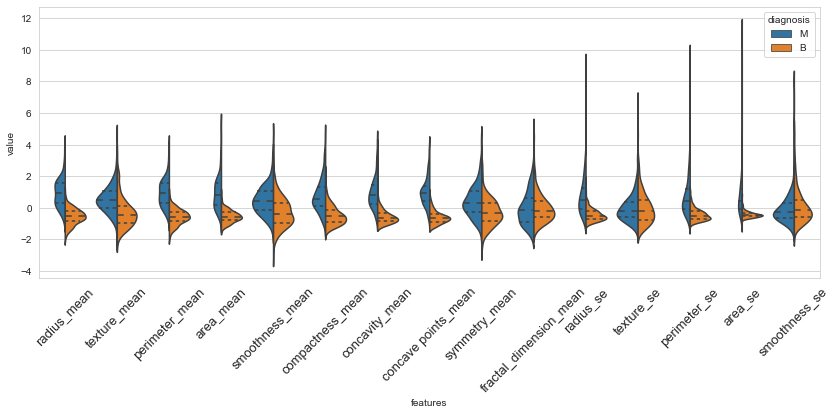

In [12]:
data_dia = df['diagnosis']
data = df.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([df['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13)

> Lets interpret the plot above together. For example, in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification

<a id='kde'></a>
> ### Kde Plot For Each Mean Feature 

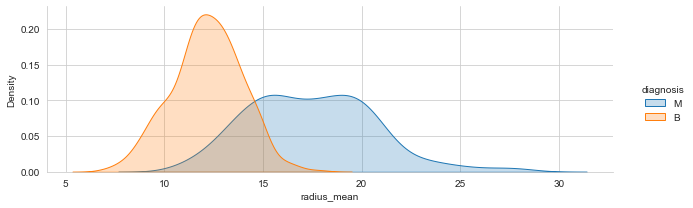

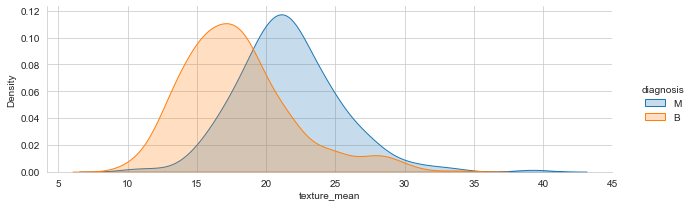

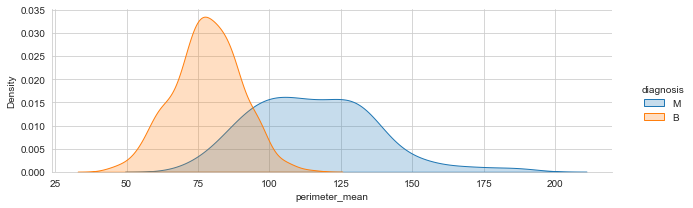

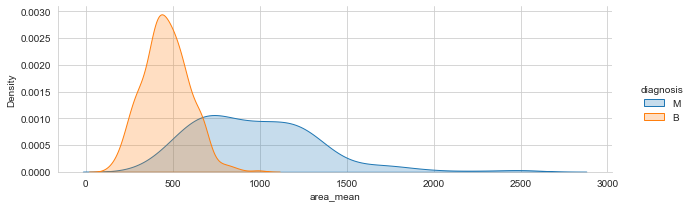

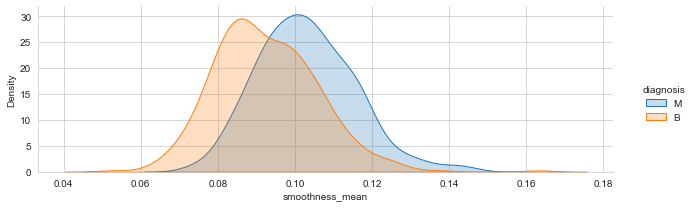

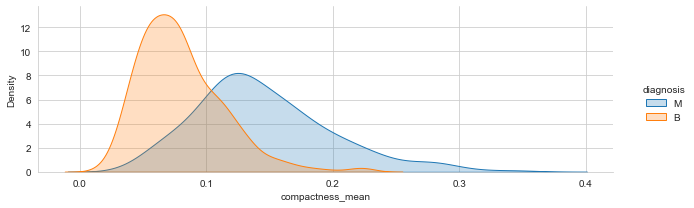

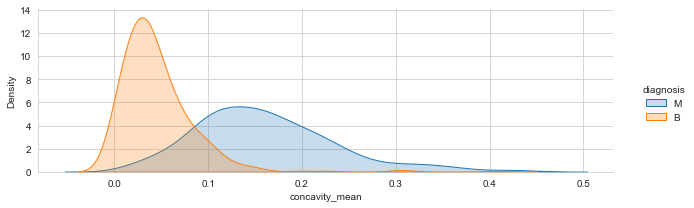

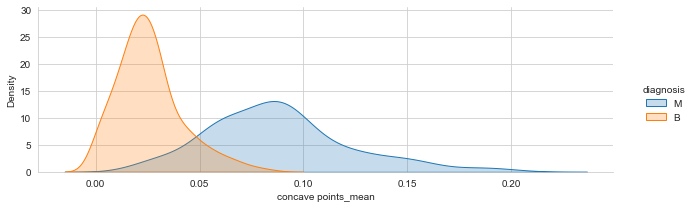

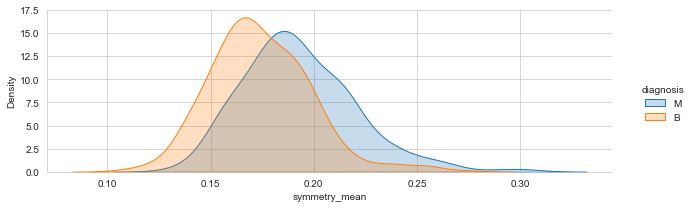

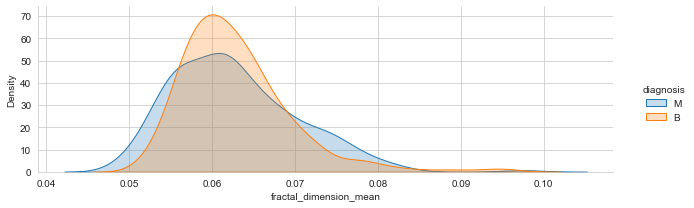

In [13]:
mean_col = [col for col in df.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()
    #ax.set_title('lalala')

<a id='rbf'></a>
## Relationship Between Features  <br>
> - We can say that two variables are related with each other, if one of them gives information about others
- For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
- Scatter Plot:  Simplest way to check relationship between two variables
- Lets look at relationship between radius mean and area mean. In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
- There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

<a id='chm'></a>
> ### Correlation Heatmap

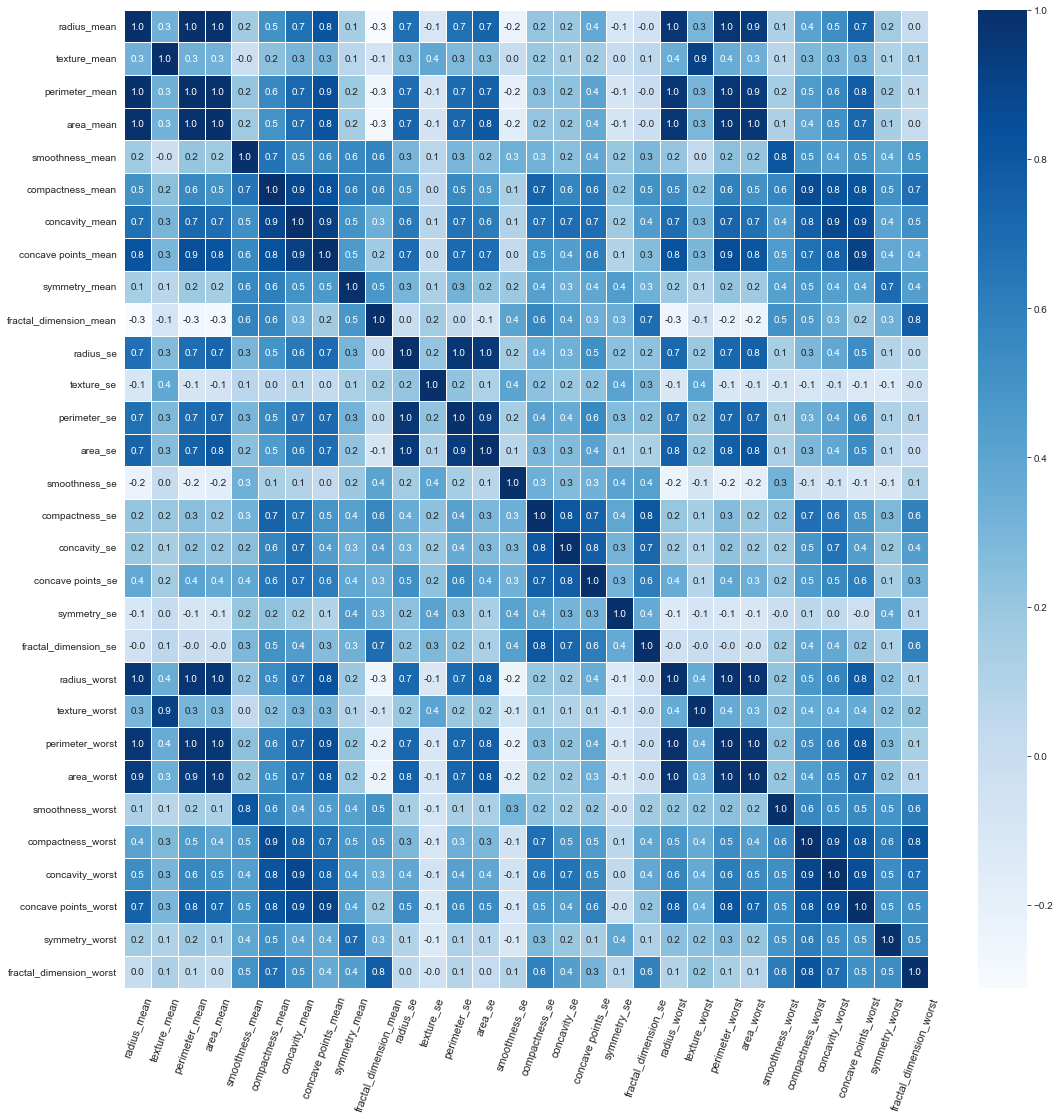

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
#cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(df.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

> **observation:**  <br> 
- the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
- compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
- so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

<a id='fp'></a>
> ### Feature Pair

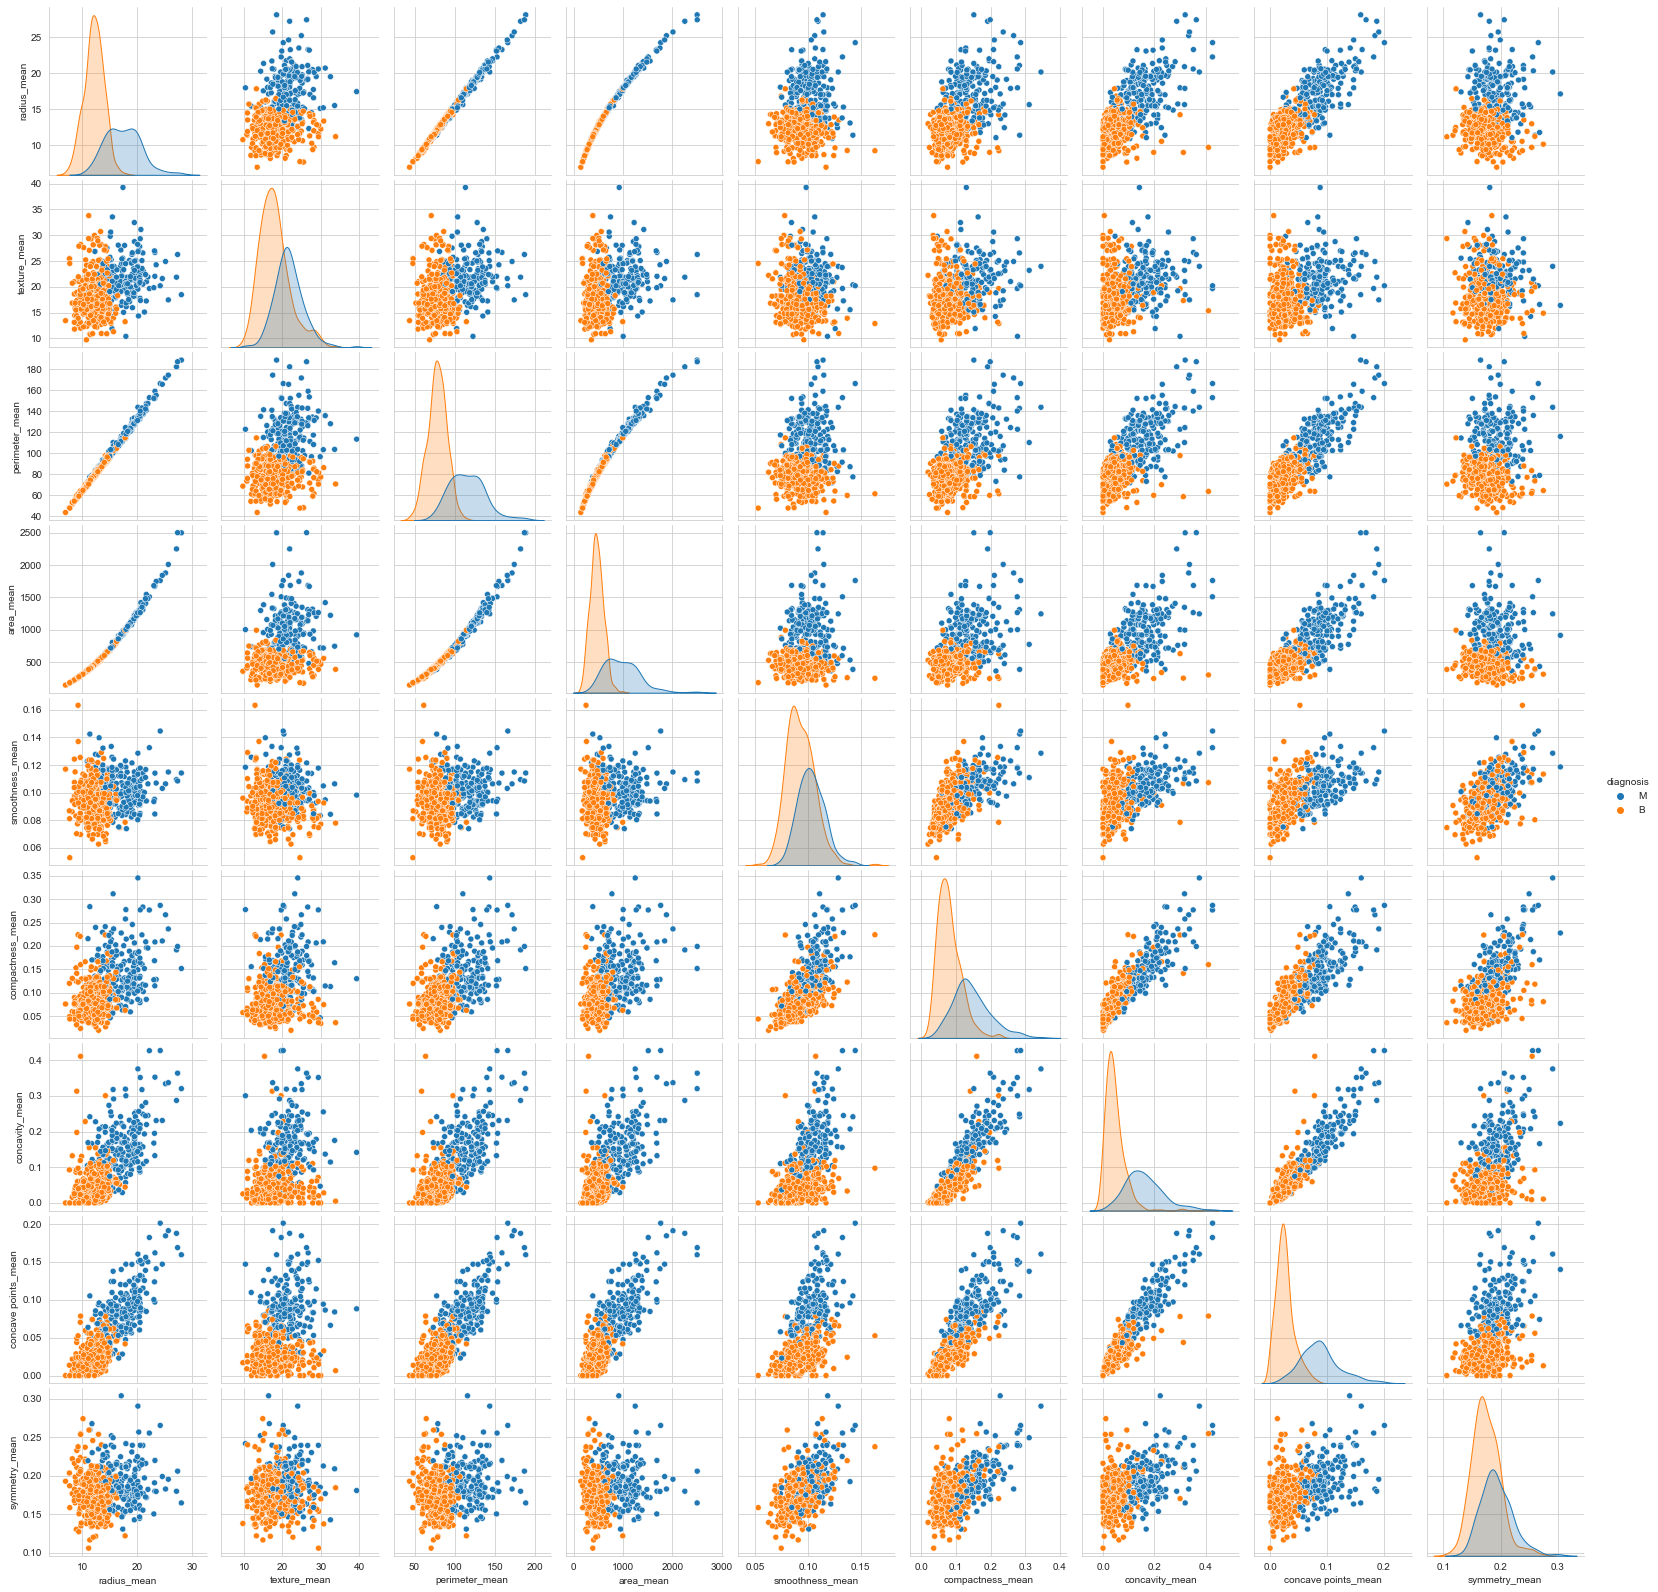

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']
sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')

<a id='pcf'></a>
> ### Positively Correlated Features

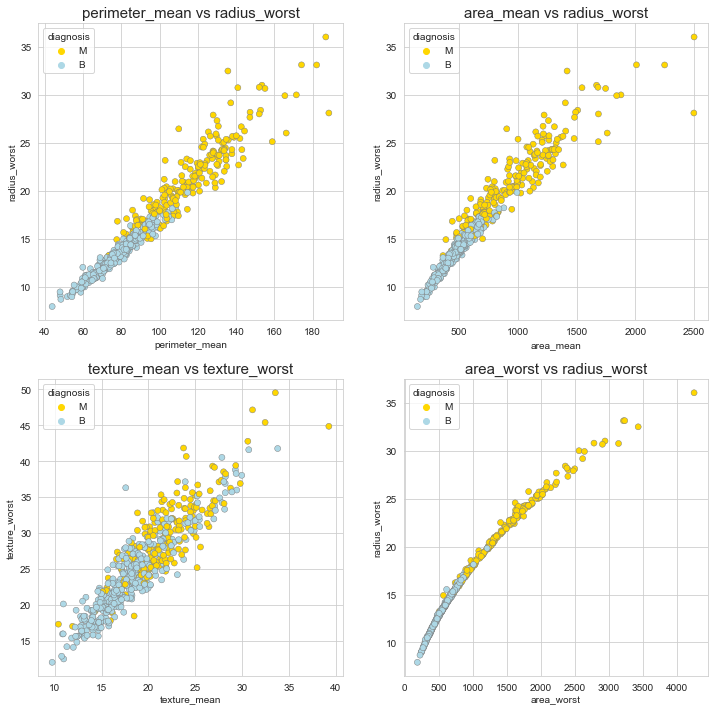

In [16]:
palette ={'B' : 'lightblue', 'M' : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.color_palette("bright")
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b,fontsize=15)
    k+=1

    
plot_scatter('perimeter_mean','radius_worst',221)   
plot_scatter('area_mean','radius_worst',222)   
plot_scatter('texture_mean','texture_worst',223)   
plot_scatter('area_worst','radius_worst',224)   

<a id = 'ucf'></a>
> ### Un-Correlated Features 

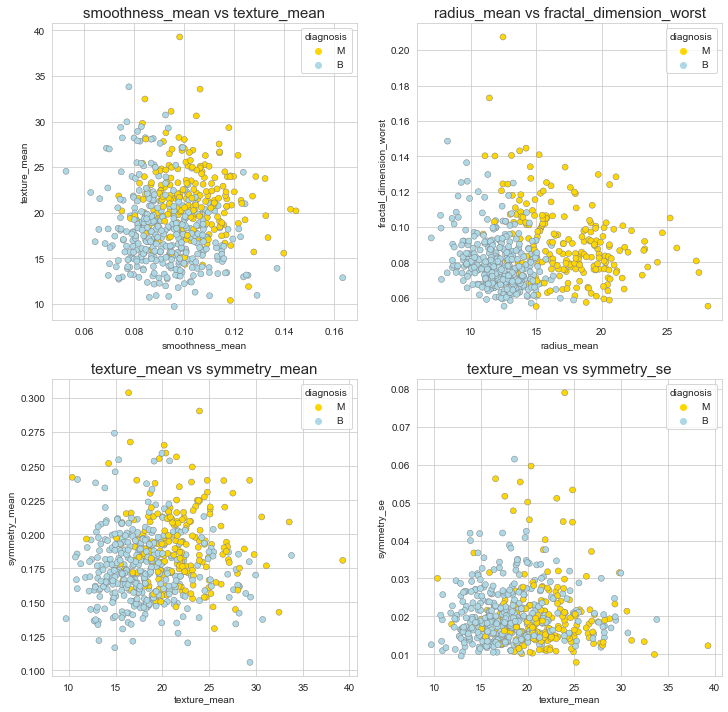

In [17]:
fig = plt.figure(figsize=(12,12))
plot_scatter('smoothness_mean','texture_mean',221)
plot_scatter('radius_mean','fractal_dimension_worst',222)
plot_scatter('texture_mean','symmetry_mean',223)
plot_scatter('texture_mean','symmetry_se',224)

<a id='ncf'></a>
> ### Negatively Correlated Features

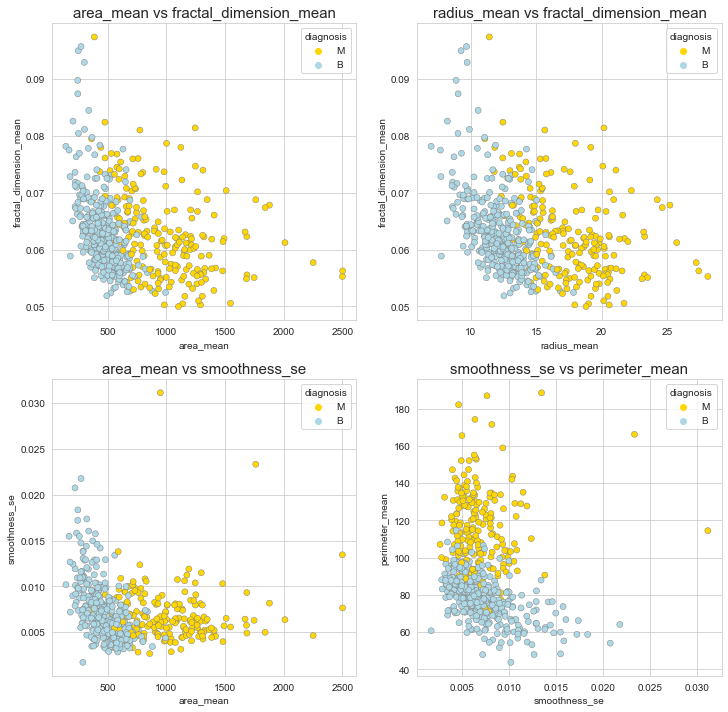

In [18]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

<a id='sa'></a>

## Statistical Analysis(Outliers Detection) <br>

> While looking histogram as yok can see there are rare values in bening distribution (green in graph) <br>
There values can be errors or rare events.   <br>
These errors and rare events can be called outliers.  <br>
Calculating outliers:   
- first we need to calculate first quartile (Q1)(25%)  <br>
- then find IQR(inter quartile range) = Q3-Q1  <br>
- finally compute Q1 - 1.5IQR and Q3 + 1.5IQR   <br>
- Anything outside this range is an outlier   <br>

<a id='bp'></a>
> ### Box Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

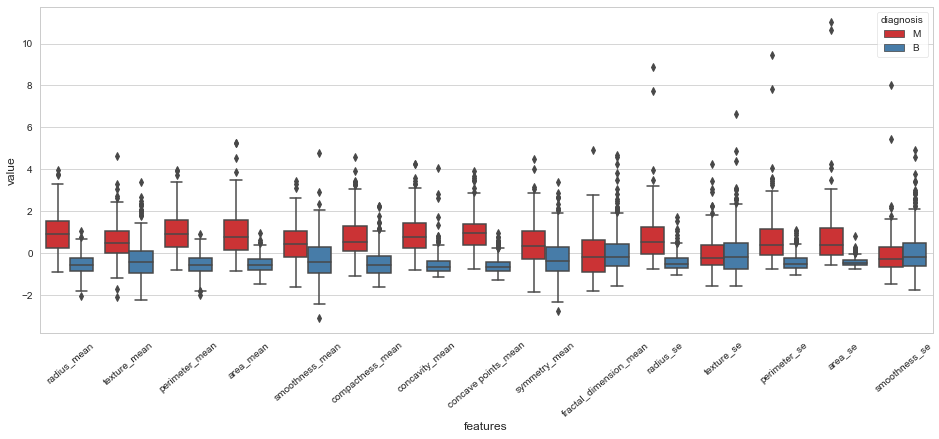

In [18]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data,palette='Set1')
plt.xticks(rotation=40)

<a id='iqr'></a>
> ### Remove Outliers Using IQR

In [19]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [20]:
df.loc[Outliers_to_drop]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.10,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,B,13.24,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.1357,0.2845,0.12490
485,B,12.45,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,...,13.78,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.1342,0.3231,0.10340
242,B,11.30,18.19,73.93,389.4,0.09592,0.1325,0.1548,0.02854,0.2054,...,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [21]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [22]:
df.shape

(486, 31)

<a id='pca'></a>
## Principal Component Analysis(PCA)

In [23]:
group_map = {"M": 1, "B": 0}

df['diagnosis'] = df['diagnosis'].map(group_map)

In [24]:
target_pca = pd.DataFrame(df['diagnosis'])
data_pca = df.drop('diagnosis', axis=1)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')

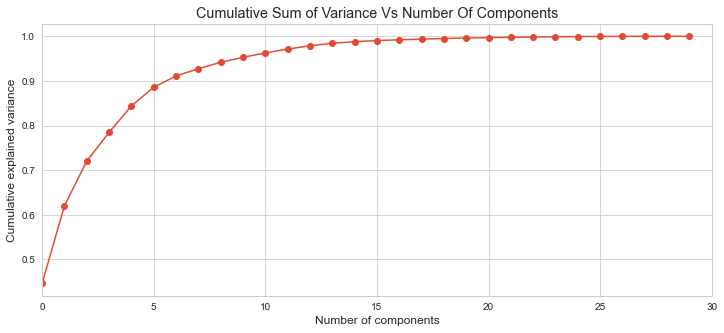

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

In [26]:
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
labels = []
for i in range(1,31):
    labels.append('Col_'+str(i))
trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15))
layout = dict(title =  'PCA : components and explained variance')
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [27]:
pca.explained_variance_ratio_

array([4.46380247e-01, 1.73921362e-01, 1.00118724e-01, 6.42590674e-02,
       5.94288560e-02, 4.15840738e-02, 2.54594333e-02, 1.62203187e-02,
       1.43275858e-02, 1.12520663e-02, 9.80155599e-03, 8.63553161e-03,
       7.40950929e-03, 5.45161332e-03, 3.70277887e-03, 2.54032992e-03,
       1.71613424e-03, 1.51916114e-03, 1.30269213e-03, 1.11344975e-03,
       9.03492816e-04, 7.68698470e-04, 6.88546885e-04, 4.77091393e-04,
       4.07666896e-04, 2.85008652e-04, 2.48131245e-04, 5.26691004e-05,
       2.05729397e-05, 3.63227443e-06])

<a id='ml'></a>
## Machine Learning Classification

<a id='sp'></a>
> ### Building Feature Set<br>
-  Preparing data for model building and checking. 30 percent of data is kept aside for validation purposes. We will also be performing scaling of data using sklearn's MinMaxScaler.

In [28]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#X = pd.DataFrame(preprocessing.scale(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<a id='svm'></a>
> ### Support Vector Machine(SVM)

In [29]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign','Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, _ = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

On linear kernel:


Confusion Matrix:
[[94  1]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.94      0.96        51

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



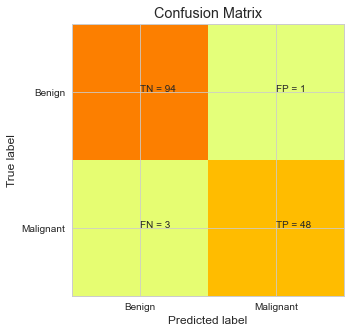

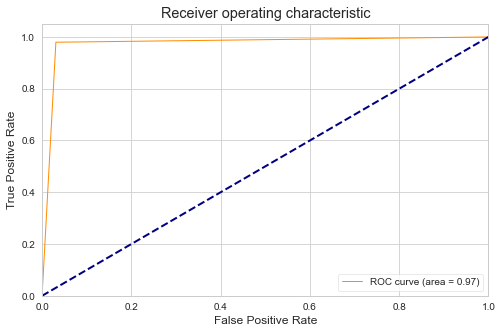


Acuuracy Of the Model:  0.9726027397260274 


On rbf kernel:


Confusion Matrix:
[[95  0]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.94      0.97        51

    accuracy                           0.98       146
   macro avg       0.98      0.97      0.98       146
weighted avg       0.98      0.98      0.98       146



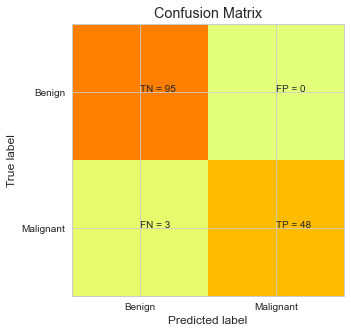

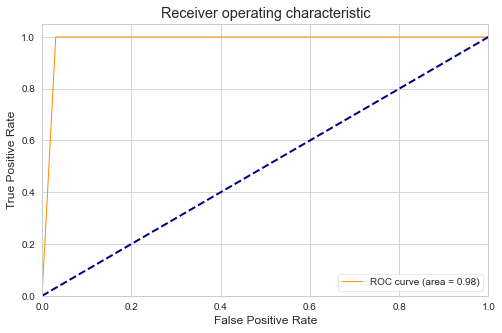


Acuuracy Of the Model:  0.9794520547945206 




In [30]:
for i in ['linear','rbf']:
    clf = SVC(kernel=i)
    clf.fit(X_train,y_train)
    print("On "+ i + " kernel:" )
    report_performance(clf)
    roc_curves(clf)
    accuracy(clf)

<a id='ks'></a>
> #### Kernel Selection Using Learning Curve

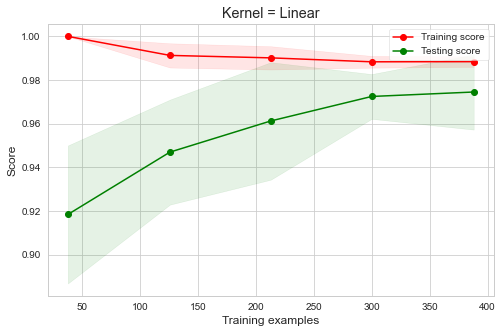

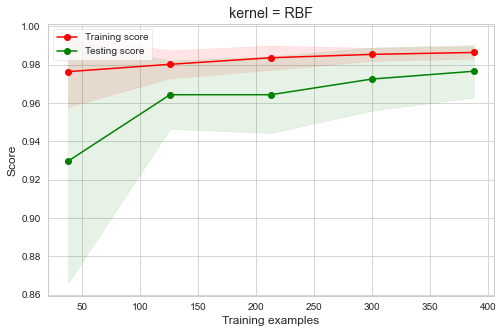

In [31]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear')
vp.plot_learning_curve(estimator, 'Kernel = Linear', X, y, cv=cv)
estimator = SVC(kernel='rbf')
vp.plot_learning_curve(estimator, 'kernel = RBF', X, y, cv=cv)

> ### Bias-Variance Tradeoff
> - High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff
> - **On RBF Kernel: High Variance**
> - There is a substantial gap between the training and testing scores.
-  The training Accuracy is close to 1 while the testing accuracy is comparitively lower (closer to 0.7). This indicates overfitting of data.
- This indicates the model is fitting the dataset well but not generalizing well hence the model is suffering from high variance(Overfitting).

<a id='srp'></a>
> #### Selection of Regularization parameter(C)
> - C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. Consider the objective function of a linear SVM 

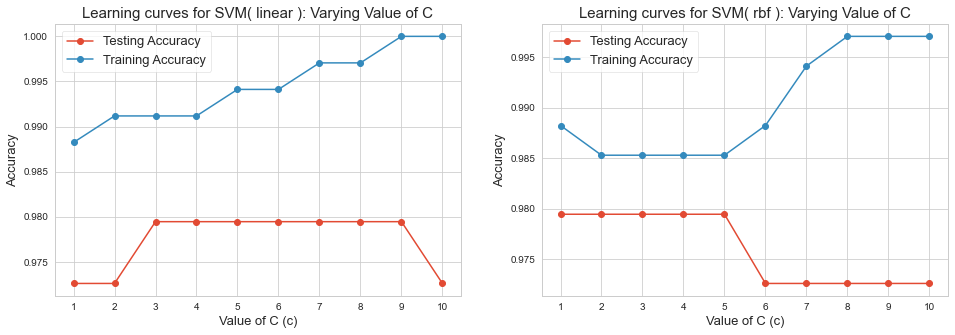

In [32]:
fig = plt.figure(figsize=(16,5))
def plotlc(kernel=None,k=0):
    plt.subplot(k)
    cp = np.arange(1, 11)
    train_accuracy = np.empty(len(cp))
    test_accuracy = np.empty(len(cp))
    for i, c in enumerate(cp):
        clf = SVC(C=c,kernel = kernel)
        clf.fit(X_train, y_train)
        train_accuracy[i] = clf.score(X_train, y_train)
        test_accuracy[i] = clf.score(X_test, y_test)

        #plt.figure(figsize=(10,5))
    plt.title('Learning curves for SVM( '+ kernel+' ): Varying Value of C', size=15)
    plt.plot(cp, test_accuracy, marker ='o', label = 'Testing Accuracy')
    plt.plot(cp, train_accuracy, marker ='o', label = 'Training Accuracy')
    plt.legend(prop={'size':13})
    plt.xlabel('Value of C (c)', size=13)
    plt.ylabel('Accuracy', size=13)
    plt.xticks(cp);
#plt.show()

plotlc('linear',121)
plotlc('rbf',122)

<a id='cmrc'></a>
> #### Confusion Matrix and ROC Curve



Confusion Matrix:
[[95  0]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.94      0.97        51

    accuracy                           0.98       146
   macro avg       0.98      0.97      0.98       146
weighted avg       0.98      0.98      0.98       146



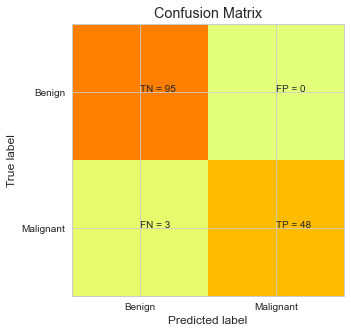

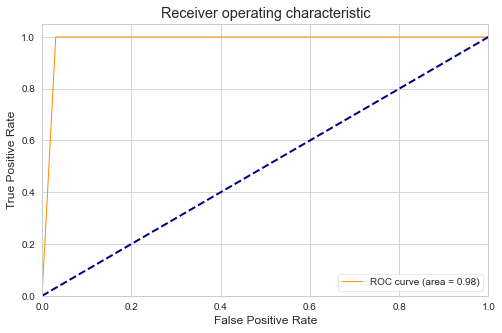


Acuuracy Of the Model:  0.9794520547945206 




In [33]:
clf = SVC(kernel='rbf',C=1)
clf.fit(X_train,y_train)
report_performance(clf)
roc_curves(clf)
accuracy(clf)

<a id='sum'></a>
## Conclusion<br>

This thorough review presented a critical analysis of BrC classification by analyzing collectively the major research endeavours presented by current scholars to assist the new researchers in this domain. Articles on BrC classification published in 2014–2018 were extensively reviewed. Overall, 49 academic studies were carefully selected from eight unique academic repositories. The review was performed on the basis of selected primary studies from five aspects, namely, datasets used, various medical imaging modalities exploited, image pre-processing techniques, types of DNNs, and performance metrics used to construct and evaluate the BrC classification model. In BrC classification, various types of public and exclusive datasets were used. However, exclusive datasets are usually smaller in size than public datasets. Thus, more researchers preferred to use public datasets over exclusive ones. However, public datasets that contain multimodality images of the same patient along with some other information, such as DNA sequence, are urgently needed. Such type of dataset can help reduce FPs using automated systems. Furthermore, among all the datasets, MG and HP imaging modalities were widely adopted, followed by US images, and very few used MRI and CT breast images. Thus, other modalities (e.g., PET, CT and thermal images) that may provide different types of lesion characteristics should be explored to improve BrC classifications results. Furthermore, in pre-processing tasks, image augmentation, scaling, image intensity/contrast normalization, stain normalization, and stain removal techniques were mostly adopted to remove image inconsistences before feeding to any DNN model. However, pre-processing techniques should be adopted carefully so that important information, such as lesion texture-, shape-, and illumination-based information, can be preserved. In this review, several types of DNN architecture were identified to classify BrC. Among these, CNN was the most popular choice of researchers for BrC classification. Of these CNN-based models, de novo and TL-based models were employed by the researchers, and results showed that de novo models showed better results. By contrast, pre-trained models were also tested on small datasets after fine tuning by using augmented images for BrC multi-class classification. To evaluate the DNN models, various performance metrics were used, such as AUC, accuracy, sensitivity, specificity, FMeasure, and VUS. Among these, the first three were more common and essential in medical image classification. Finally, this review revealed various new research challenges that require extensive efforts to improve BrC classification models. We believe that this comprehensive review will provide a profound understanding of the BrC classification domain and valuable insights to researchers in this field.

<a id='ref'></a>
## References<br>
1. World Health Organization (2018) Cancer. Retrieved from http://www.who.int/en/news-room/fact-sheets/detail/cancer.
2. Beutel J, Kundel HL, Van Metter RL (2000) Handbook of medical imaging, vol 1. SPIE Press, Bellingham
3. Goceri E (2017) Advances in digital pathology. Paper presented at the international conference on applied analysis and mathematical modeling. Istanbul, Turkey
4. Kasban H, El-Bendary M, Salama D (2015) A comparative study of medical imaging techniques. Int J Inf Sci Intell Syst 4:37–58
5. Gurcan MN, Boucheron L, Can A, Madabhushi A, Rajpoot N, Yener B (2009) Histopathological image analysis: a review. IEEE Rev Biomed Eng 2:147
6. Sophie Softley Pierce, P. M., Breast Cancer Care (2017) Three quarters of NHS Trusts and Health Boards say ‘not enough’ care for incurable breast cancer patients
7. Doi K (2007) Computer-aided diagnosis in medical imaging: historical review, current status and future potential. Comput Med Imaging Graph 31(4–5):198–211
8. Sadaf A, Crystal P, Scaranelo A, Helbich T (2011) Performance of computer-aided detection applied to full-field digital mammography in detection of breast cancers. Eur J Radiol 77(3):457–461
9. Schneider M, Yaffe M (2000) Better detection: improving our chances. Paper presented at the Digital mammography: 5th international workshop on digital mammography IWDM

<center><span>&#8226;</span>&nbsp; &nbsp;<a href='https://www.github.com/FehintolaObafemi'>Github</a>&nbsp; &nbsp;&nbsp; &nbsp;<span>&#8226;</span>&nbsp; &nbsp;<a href='https://www.linkedin.com/in/taofeek-obafemi-babatunde/'>Linkedin</a><center>